In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
veri = pd.read_csv("olimpiyatlar_temizlenmis_20220204.csv")
veri.head()

,Name,Gender,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [4]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39783 entries, 0 to 39782
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      39783 non-null  object 
 1   Gender    39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.9+ MB


In [5]:
veri.columns

Index(['Name', 'Gender', 'yas', 'boy', 'kilo', 'takim', 'uok', 'yil', 'sezon',
       'sehir', 'spor', 'etkinlik', 'madalya'],
      dtype='object')

# sütun isimlerini değiştirme

In [6]:
#örnek olması için ilk üç sütunu değiştirdim, csv dosyası düzenlenilip paylaşılmış.
veri.rename(columns={'isim'     : 'Name',
                     'cinsiyet' : 'Gender',
                     'Age'      :  'yas'}, inplace=True) #(inplace= True) anlamı, ismi değiştirilen kelimenin direkt üstüne yazılmasını sağlar.

# Sütun Çıkarma

In [7]:
#sütun çıkarma örneği aşağıda yazdığım gibidir. paylaşıla dosya değiştiği için hata veriyor.
veri = veri.drop(["id","oyunlar"], axis=1) #(axis = 1) sütun demektir

KeyError: "['id', 'oyunlar'] not found in axis"

In [ ]:
veri.head()

,Name,Gender,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


# Boy ve Kilo Sütunu Kayıp Veri Doldurma

In [ ]:
essiz_etkinlik = pd.unique(veri.etkinlik)
print(len(essiz_etkinlik))
essiz_etkinlik[:10] #baştan 10 tanesini verir

756


array(["Tug-Of-War Men's Tug-Of-War",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Ice Hockey Men's Ice Hockey",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Pommelled Horse", "Alpine Skiing Men's Super G",
       "Alpine Skiing Men's Giant Slalom"], dtype=object)

In [ ]:
# Her bir etkinliği iteratif olarak dolaş
# Etkinlik özelinde boy ve kilo ortalamalarını hesapla
# Etkinlik özelinde kayıp boy ve kilo değerlerini etk. ort. eşitle

veri_gecici = veri.copy() # gerçek veri bozulmaması için kopyasını oluşturduk.
boy_kilo_liste  = ["boy", "kilo"]

for e in essiz_etkinlik: #Liste içerisinde dolaşacağım
    #etkinlik filtresi oluşturalım
    etkinlik_filtre = veri_gecici.etkinlik == e
    #veriyi etkinliğe göre filtreleyelim
    veri_filtreli = veri_gecici[etkinlik_filtre]

    #boy ve kilo için etkinlik özelinde ortalamaları hesaplayalım
    for s in boy_kilo_liste:
        ortalama = np.round(np.mean(veri_filtreli[s]),2)
        if ~np.isnan(ortalama): #eğer etlinlik özelinde ortalama varsa
            veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)
        else: #eğer etkinlik özelinde ortalama varsa ortalamayı hesapla
            tüm_veri_ortalamasi = np.round(np.mean(veri[s]),2)
            veri_filtreli[s] = veri_filtreli[s].fillna(tüm_veri_ortalamasi)
    #etkinlik özelinde kayıp değerleri doldurulmuş olan veriyi, veri_gecici'ye eşitleyelim
    veri_gecici[etkinlik_filtre] = veri_filtreli

#kayıp değerleri gidelilmiş olan geçici veriyi gerçek veriye eşitle
veri = veri_gecici.copy()
veri.info() #boy ve kilo sütunlarında kayıp değer sayısına bakalım



C:\Users\emreu\AppData\Local\Temp\ipykernel_20100\4067033201.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39783 entries, 0 to 39782
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      39783 non-null  object 
 1   Gender    39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.9+ MB


In [ ]:
# yaş değişkeninde tanımlı olmayan değerleri bulacağız.
# "tilda" işareti ile yaş değişkeni tanımlı olanlar bulunacak


yas_ortalamasi = np.round(np.mean(veri.yas),2)
print("yas ortlamasi: {}".format(yas_ortalamasi))
veri["yas"] = veri["yas"].fillna(yas_ortalamasi)
veri.info()


yas ortlamasi: 25.92
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39783 entries, 0 to 39782
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      39783 non-null  object 
 1   Gender    39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.9+ MB


In [ ]:
# madalya alamayan sporculari veri setinden cikaracagiz
madalya_degiskeni = veri["madalya"]
pd.isnull(madalya_degiskeni).sum()

0

In [ ]:
madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni)
veri = veri[madalya_degiskeni_filtresi]
veri.head()

,Name,Gender,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [ ]:
veri.to_csv("olimpiyatlar_temizlenmis_20220204.csv", index=False)

In [ ]:
#öncelikli olarak histogram grafiklerini çizdireceğimiz fonksiyon yazma
def plotHistogram(degisken):
    """""
        girdi   : degisken/sütun ismi
        çikti   : ilgili değişkenin histogrami 
    """""
    
    plt.figure()
    plt.hist(veri[degisken],bins = 85, color="orange")
    plt.xlabel(degisken)
    plt.ylabel("frekans")
    plt.title("Veri sikligi - {}".format(degisken))
    plt.show()




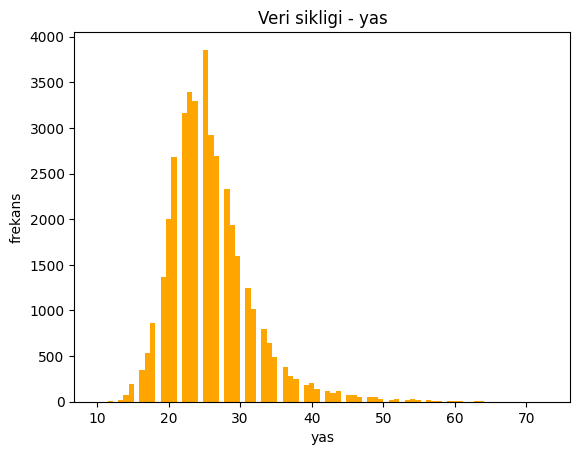

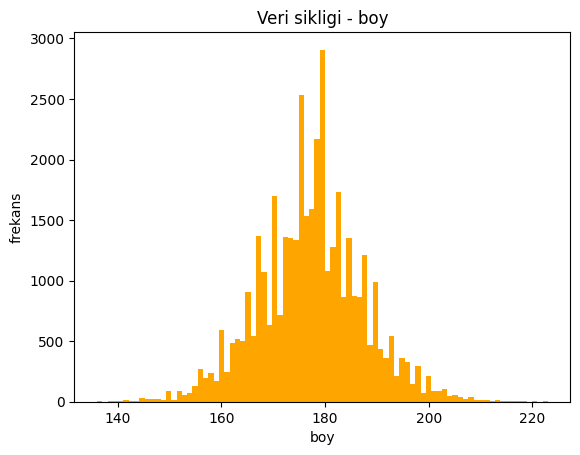

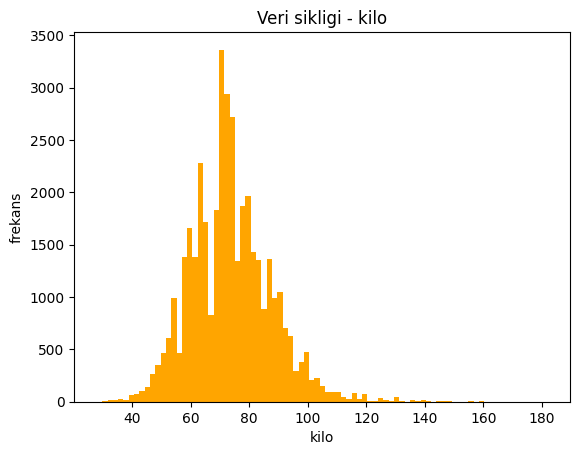

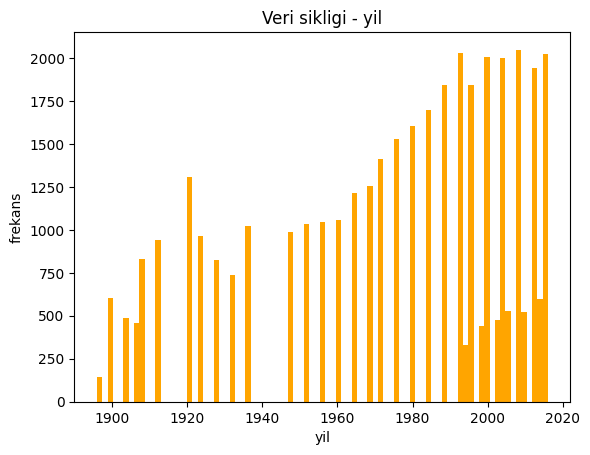

In [ ]:
# Tüm sayısal değişkenler için histogramları çizdirelim
Sayisal_degisken = ["yas","boy","kilo","yil"]
for i in Sayisal_degisken:
    plotHistogram(i)

In [ ]:
veri.describe()

,yas,boy,kilo,yil
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


In [21]:

def plotBar(degisken, n = 5):
    """
    Girdi : Degişken / süten ismi
        n = Gösterilecek eşsiz değer sayisi
    Çikti: çubuk grafigi
    """
    veri_ = veri[degisken]
    veri_sayma = veri_.value_counts()
    veri_sayma = veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index, veri_sayma, color= "orange")
    plt.xticks(veri_sayma.index)
    plt.xticks(rotation= 45)
    plt.ylabel("frekans")
    plt.title("veri Sıklığı - {}".format(degisken))
    plt.show

    print("{}: \n".format(degisken,veri_sayma))


Name: 

Gender: 

takim: 

uok: 

sehir: 

spor: 

etkinlik: 

madalya: 



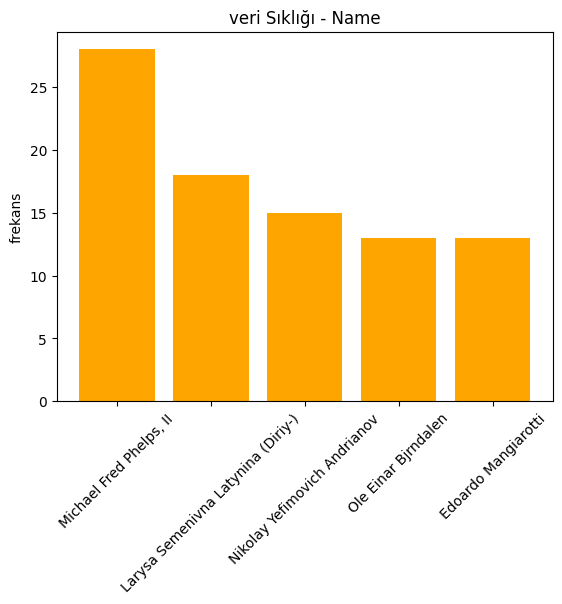

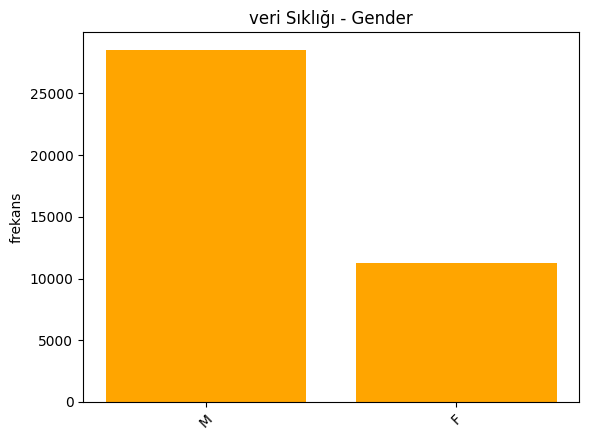

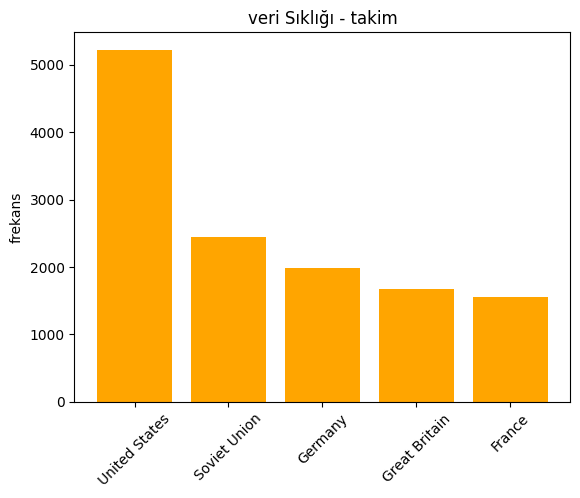

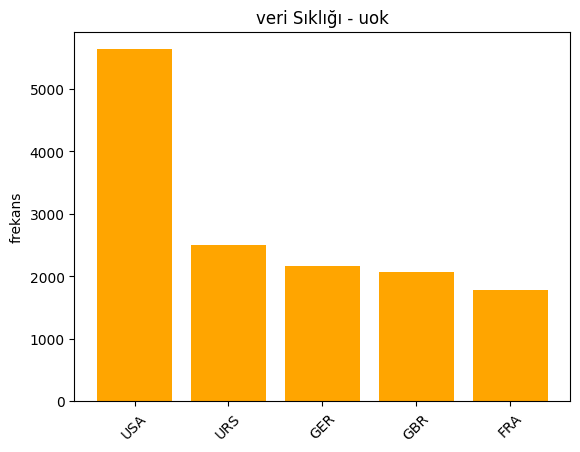

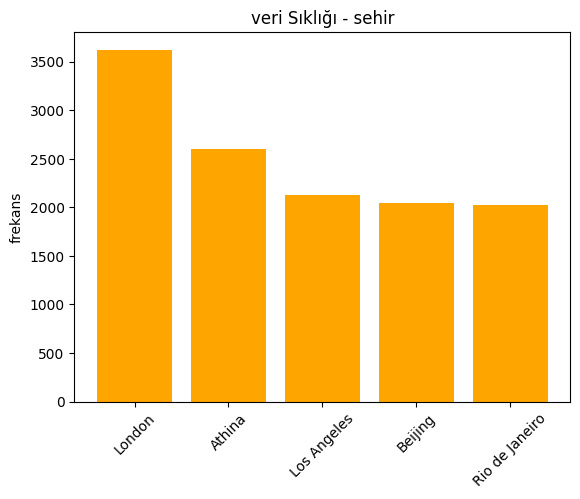

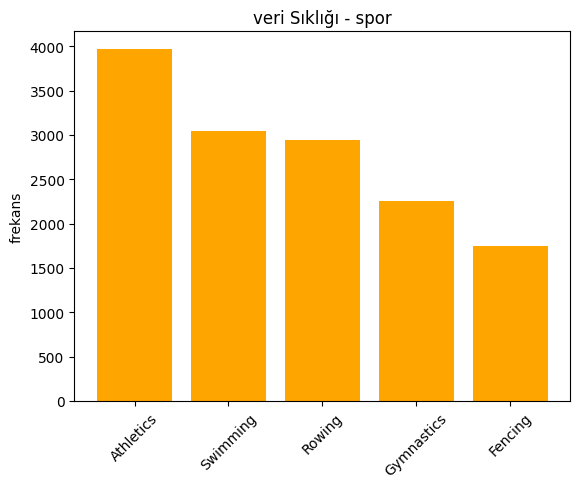

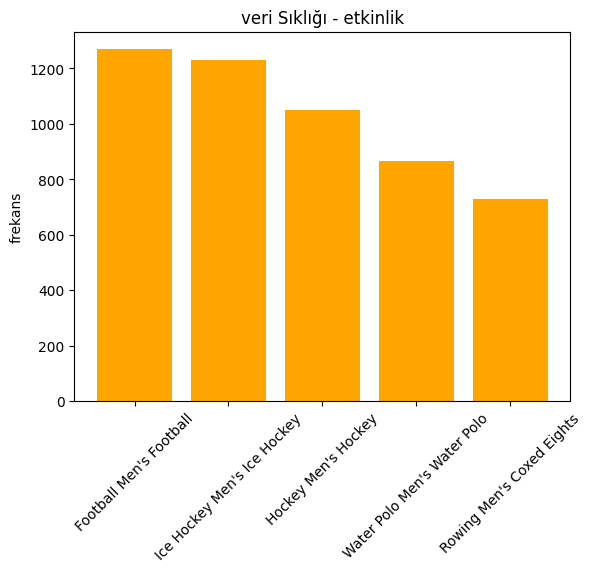

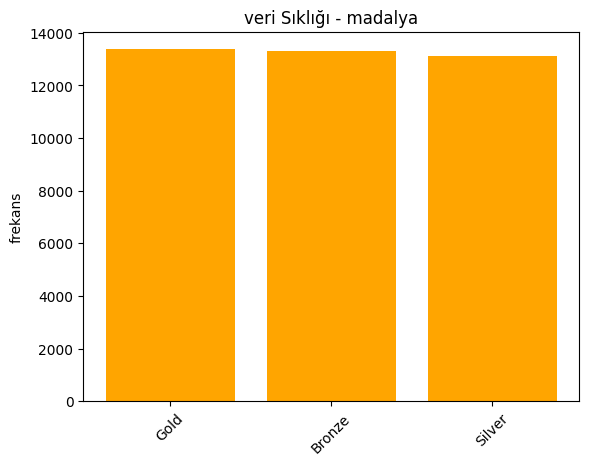

In [22]:
kategorik_degisken = ["Name","Gender","takim","uok","sehir","spor","etkinlik","madalya"]
for i in kategorik_degisken:
    plotBar(i)

# iki değişkenli veri analizi

In [26]:
#cinsiyete göre boy ve ağırlık karşılaştırılması
erkek = veri[veri.Gender == "M"]
erkek.head(3)
kadin = veri[veri.Gender == "F"]
kadin.head(3)

,Name,Gender,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
17,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
19,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
21,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze


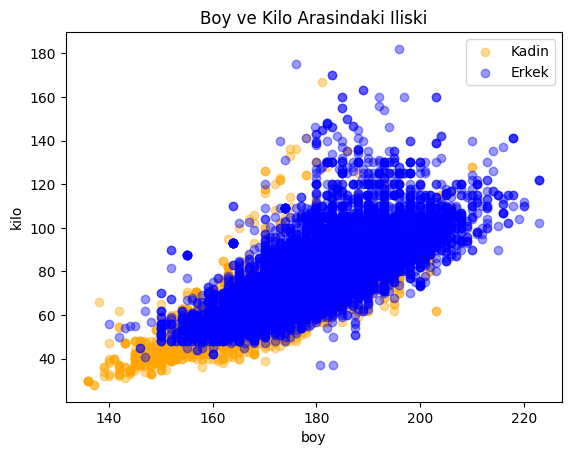

In [35]:
plt.figure()
plt.scatter(kadin.boy, kadin.kilo, alpha=0.4, label="Kadin",color="orange") #alpha, transparan çizmeye yarar
plt.scatter(erkek.boy, erkek.kilo, alpha=0.4, label= "Erkek", color="blue")
plt.xlabel("boy")
plt.ylabel("kilo")
plt.title("Boy ve Kilo Arasindaki Iliski")
plt.legend()
plt.show()

# sayisal sütünlar arasin iliski incelemesi

In [36]:
veri.loc[:,["yas","boy","kilo"]].corr() #bütün sütunlar, belirtilen satırlar, korelasyon tablosu.


,yas,boy,kilo
yas,1.000000,0.061890,0.136349
boy,0.061890,1.000000,0.794368
kilo,0.136349,0.794368,1.000000


# madalya ve yas arasindaki iliski

In [38]:
veri_gecici = veri.copy()
veri_gecici = pd.get_dummies(veri_gecici, columns=['madalya']) #kontrol amacı ile kullanılabilir, belirtilen stünları parçaya ayırı
veri_gecici.head(2)

,Name,Gender,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,False,True,False
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,True,False,False


In [39]:
veri_gecici.loc[:,["yas","madalya_Bronze","madalya_Gold","madalya_Silver"]].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


# takımların kazandıkları altın, gümüş ve bronz madalya sayıları

In [42]:
veri_gecici[["takim","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["takim"], as_index=False).sum().sort_values(by="madalya_Gold",ascending=False)[:10]

,takim,madalya_Bronze,madalya_Gold,madalya_Silver
462,United States,1233,2474,1512
403,Soviet Union,677,1058,716
165,Germany,678,679,627
215,Italy,484,535,508
171,Great Britain,572,519,582
149,France,577,455,518
420,Sweden,507,451,476
198,Hungary,365,432,330
67,Canada,408,422,413
117,East Germany,263,369,309


# kazanılan madalyaların hangi sehirde kazanıldıgı

In [43]:
veri_gecici[["sehir","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["sehir"], as_index=False).sum().sort_values(by="madalya_Gold",ascending=False)[:10]

,sehir,madalya_Bronze,madalya_Gold,madalya_Silver
17,London,1214,1215,1195
3,Athina,860,883,859
18,Los Angeles,706,726,691
6,Beijing,710,671,667
27,Rio de Janeiro,703,665,655
38,Sydney,680,663,661
4,Atlanta,629,608,605
5,Barcelona,604,559,549
33,Seoul,549,520,513
2,Antwerpen,367,493,448


# Cinsiyete göre madalya 

In [46]:
veri_gecici[["Gender","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["Gender"], as_index=False).sum().sort_values(by="madalya_Gold",ascending=False)[:10]

,Gender,madalya_Bronze,madalya_Gold,madalya_Silver
1,M,9524,9625,9381
0,F,3771,3747,3735


# Çok Degiskenli Veri Analizi

In [50]:
veri_pivot = veri.pivot_table(index="madalya",columns="Gender"
                              ,values=["boy","kilo","yas"],
                              aggfunc={"boy": np.mean,
                                       "kilo":np.mean,
                                       "yas":[min,max,np.std]}) 
veri_pivot.head()

C:\Users\emreu\AppData\Local\Temp\ipykernel_22044\1265769079.py:1: FutureWarning: The provided callable <function mean at 0x00000250BB4D81F0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  veri_pivot = veri.pivot_table(index="madalya",columns="Gender"
C:\Users\emreu\AppData\Local\Temp\ipykernel_22044\1265769079.py:1: FutureWarning: The provided callable <function mean at 0x00000250BB4D81F0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  veri_pivot = veri.pivot_table(index="madalya",columns="Gender"
C:\Users\emreu\AppData\Local\Temp\ipykernel_22044\1265769079.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. 

boy                   kilo              yas                    \
               mean                   mean              max         min         
Gender            F           M          F          M     F     M     F     M   
madalya                                                                         
Bronze   170.003227  180.045806  62.757125  77.841504  69.0  72.0  12.0  10.0   
Gold     170.448727  180.318906  63.199349  78.186505  63.0  64.0  13.0  13.0   
Silver   170.233783  180.053626  62.866892  77.960887  55.0  73.0  11.0  13.0   

                             
              std            
Gender          F         M  
madalya                      
Bronze   5.329229  5.870340  
Gold     5.219615  5.987807  
Silver   5.253111  6.098221